# CSE 351 Project - Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning
import warnings
warnings.filterwarnings('ignore')

## Data Importation and Cleaning

In [2]:
# read from files
df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/test.csv")

In [3]:
# concat all data into one to do EDA
df = pd.concat([df1,df2])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can't dropna. It will lose 90% data

In [4]:
df.shape

(1309, 12)

In [5]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Check which columns have null

In [6]:
df.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

#### Fill Age NA

In [7]:
# fill age will mean of age
df['Age'] = df['Age'].fillna(float(round(df['Age'].mean())))

#### Fill Fare NA

In [8]:
(df['Fare'].isnull() == True).sum() # There is only one null in Fare

1

In [9]:
df[df['Fare'].isna()] # This passenger is 3rd class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [10]:
# calculate 3rd class fare mean
df['Fare'].fillna(df[df['Pclass']==3]['Fare'].mean(),inplace=True)

In [11]:
df.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Fill Cabin NA

In [12]:
(df['Cabin'].isnull() == True).sum() # see how many Cabin missed

1014

In [13]:
df['Cabin'].value_counts() # see how many different Cabins

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F33                4
C22 C26            4
                  ..
B24                1
E10                1
B86                1
B26                1
A7                 1
Name: Cabin, Length: 186, dtype: int64

In [14]:
# it's impossible to fillna with hand made value, so fill na with just NA
df['Cabin'].fillna("NA",inplace=True)

#### Fill Embarked

In [15]:
(df['Embarked'].isnull()==True).sum() # There are only two embarked are missing

2

In [16]:
df[df['Embarked'].isna()] # They both are 1st class passenger

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
df[df['Pclass']==1]['Embarked'].value_counts() 
# We can see that nearly all 1st class passengers are from S or C

S    177
C    141
Q      3
Name: Embarked, dtype: int64

In [18]:
df['Embarked'].fillna('S',inplace=True)

#### Fill Survived NA

In [19]:
df['Survived'].isnull().value_counts() # there are 418 missed

False    891
True     418
Name: Survived, dtype: int64

In [20]:
df['Survived'].fillna(2.0,inplace=True) # create a new label 2, means passenger is unknown/missed

#### Overall Check

In [21]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

We complete data imputing

## Outlier Check

Ignore Id, survived, p class, name, Cabin and Embark Fields

In [22]:
df["Sex"].describe() # Sex is fine, no outliers

count     1309
unique       2
top       male
freq       843
Name: Sex, dtype: object

In [23]:
df["Age"].describe() # We can see the min of age is 0.017

count    1309.000000
mean       29.905019
std        12.883281
min         0.170000
25%        22.000000
50%        30.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [24]:
df[df['Age']<5].sort_values(by='Age') # from this part we can see that this might not be an outlier.
# Those who got age under 1.0 is new born babies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,1246,2.0,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NA,S
201,1093,2.0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NA,S
803,804,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NA,C
755,756,1.0,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NA,S
281,1173,2.0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NA,S
644,645,1.0,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NA,C
469,470,1.0,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NA,C
78,79,1.0,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NA,S
307,1199,2.0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NA,S
831,832,1.0,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NA,S


In [25]:
df['Fare'].describe() # There are some fare extremly high, check those one

count    1309.000000
mean       33.280206
std        51.741830
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [26]:
df.sort_values(by='Fare',ascending=False).head(10) # Still, I don't think this is the outlier
#Their ticket number are the same so I assume they bought some kind of "group tickets"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
343,1235,2.0,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NA,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
53,945,2.0,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
69,961,2.0,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S


In [27]:
df['SibSp'].describe()
# Sbling numbers seems reasonable. There might be some family planning to take family trip

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [28]:
df['Parch'].describe() 
# If above Sibling and spouse number has max of 8, then Parch has max number of 9 is reasonable

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

This data is pretty clean

## Socio-Economic Status

I'd like to assume SES with PClass First. Then make a heatmap of correlation of SES, age, gender, family numbers.

In [29]:
df['Family'] = df['SibSp']+df['Parch']+1 # creater family numbers by adding siblings parents and themselve

In [30]:
map = {"male":1,"female":0}
df['Sex'] = df['Sex'].map(map)

<AxesSubplot:>

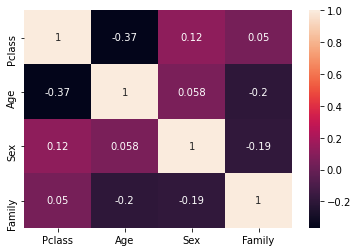

In [31]:
sns.heatmap(df.loc[:,['Pclass','Age','Sex','Family']].corr(),annot=True)

From above data we see that a young man can have high SES on that boat.

Pclass get higher when age get lower, so that means 1 p class has more young people.
p class has slightly correlation with gender, which means more man has higher SES
Pclass doesn't have much relationship with family member. Maybe it is because not a lot of family are on this boat.

## Survival distribution to Age, Gender and SES

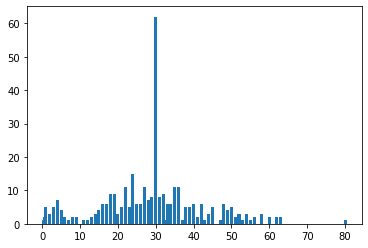

In [32]:
ins = df[df['Survived']==1]['Age'].value_counts()
plt.bar(ins.index,ins)
plt.show()

We can see from this plot that age around 20-40 have higher survive rate

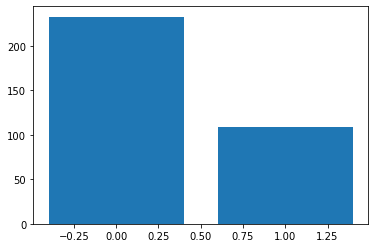

In [33]:
ins = df[df['Survived']==1]['Sex'].value_counts()
plt.bar(ins.index,ins)
plt.show()

0 is women and 1 is man. We can see that women have higher survive rate than man

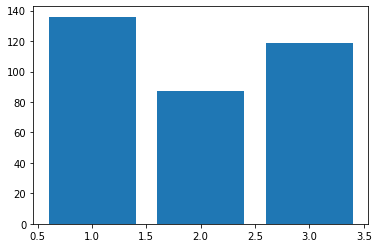

In [34]:
ins = df[df['Survived']==1]['Pclass'].value_counts()
plt.bar(ins.index,ins)
plt.show()

We can see that class 1 and 3 have higher to survive. We also know that there are not a lot of people in class 1 and lots of people in class 3. This might be one factor that cause this plot to look like this.

## Does family size affect survival chance

<AxesSubplot:xlabel='Family'>

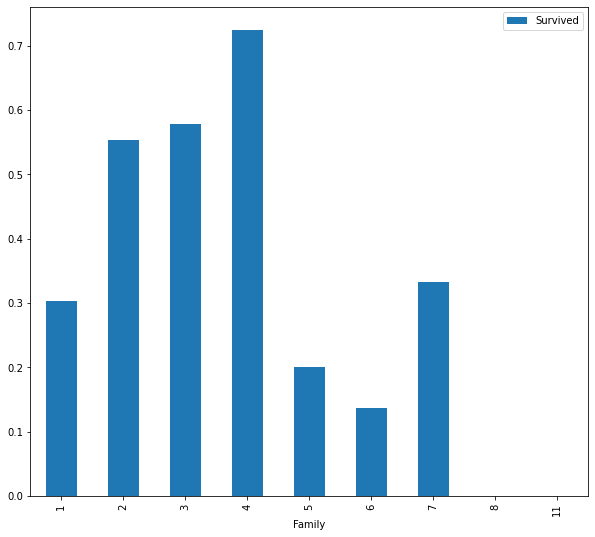

In [35]:
df[df['Survived']!=2][['Family','Survived']].groupby('Family').mean().plot(kind='bar',figsize=(10,9))

People that have more faily on this ship have relative low survive rate. The highest survival rate is between family size of 2-4

## Does Ticket price have to do with survival rate

<AxesSubplot:xlabel='Fare Bucket'>

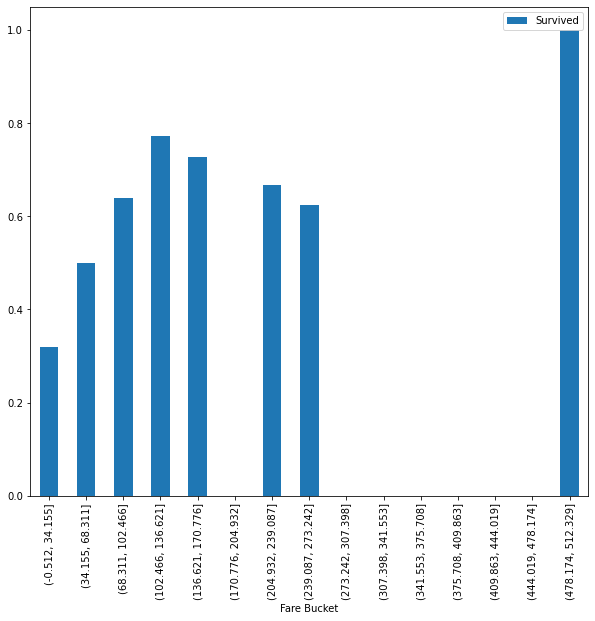

In [36]:
df['Fare Bucket'] = pd.cut(df['Fare'],15)

df[df['Survived']!=2][['Fare Bucket','Survived']].groupby('Fare Bucket').mean().plot(kind='bar',figsize=(10,9))

Here is an interesting result. People who payed higher ticker fare has relativly high survive chance. Maybe high price ticket get to sit next to the lifeboat

# What features seem to be the most important ones?

In [37]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plot

Survived and Pclass have a pearson correlation:  0.15212759559351285
Survived and Sex have a pearson correlation:  0.21986327977787146
Survived and Age have a pearson correlation:  0.013025324581192503
Survived and SibSp have a pearson correlation:  0.044390798247569946
Survived and Parch have a pearson correlation:  0.03458569342897236
Survived and Fare have a pearson correlation:  0.12261880113668758
Survived and Embarked have a pearson correlation:  0.10499151384505759
Survived and Family have a pearson correlation:  0.010295303564330038


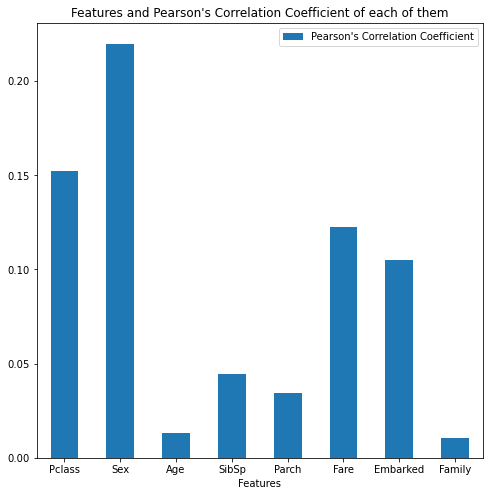

In [38]:
# map embarked harbor into number
labels = list(df['Embarked'].unique())
df['Embarked'] = df['Embarked'].apply(lambda n: labels.index(n))
# Store the features and init a list for storing the results
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family']
results = []
# Loop through the features, calculate the Pearson's Correlation Coefficient and store them
for x in features:
    # I use the absolute value here, since I want to compare the correlation between features,
    #  so it does not matter if it's positive or negative
    rela_temp = abs(pearsonr(df['Survived'], df[x])[0])
    print("Survived and", x ,"have a pearson correlation: ",rela_temp)
    results.append(rela_temp)
tempdata = {"Features": features, "Pearson's Correlation Coefficient": results} # make it as a dictionary
plotframe = pd.DataFrame(data=tempdata) # and then create a dataframe
titlestr = "Features and Pearson's Correlation Coefficient of each of them" # make title text
plotframe.plot.bar(x='Features', y="Pearson's Correlation Coefficient", rot=0, title=titlestr, figsize=(8,8)) # create a bar plot based on the dictionary
plot.show(block=True) # show the plot

In [39]:
# As shown in the plot above, all the features do not have a strong correlation with survive condition.
# And the highest correlation is between survived and Sex.
# I think that's because men give women the priority to escape at the time, so there are more survived women than men.

# How can you extract information from the non-numerical features?

In [40]:
# There are not too many non-numerical features in the dataframe.
# First, Name is completely useless since of course the name will not affect the survive rate, so we drop it.
# And for Sex, there are only 'female' and 'male' in the dataframe, so we represent them as 0 and 1.
# And for Ticket and Cabin, we deal with them while calculating the socio-economic status.
# Then, the Embarked as well has only three unique values. So we record it as 0, 1, and 2.

## Modeling

In [41]:
# First drop/map strings
df.drop('Name',axis=1,inplace=True) # name can't help with survival rate

Ticket numbers are formed up by cabin informations according to this link:
https://www.encyclopedia-titanica.org/cabins.html
So i will drop the tickets part incase it have some other high correlation with Cabin and other features

In [42]:
df.drop('Ticket',axis=1,inplace=True)

In [43]:
# drop fare bucket also, it's correlated with Fare
df.drop('Fare Bucket',axis=1,inplace=True)

In [44]:
# map embarked harbor into number
labels = list(df['Embarked'].unique())
df['Embarked'] = df['Embarked'].apply(lambda n: labels.index(n))

In [45]:
# from Cabin, extract Deck letter and room number. If mnltiply exist only extract first one
df['Deck'] = df['Cabin'].str.slice(0,1)
df['Room'] = df['Cabin'].str.slice(1,5).str.extract("([0-9]+)",expand=False).astype('float')
df['Room'].fillna('0',inplace=True)

In [46]:
# map deck letter into numbers
labels = list(df['Deck'].unique())
df['Deck'] = df['Deck'].apply(lambda n: labels.index(n))

In [47]:
df['Cabin'] = df['Cabin'].apply(lambda x: 0 if x == 'NA' else 1) 
# Change cabin, if passenger havea cabin map to 1 other wise 0

In [48]:
df= df.astype('float32')

In [49]:
df.head() # check

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Deck,Room
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.250000,0.0,0.0,2.0,0.0,0.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.283302,1.0,1.0,2.0,1.0,85.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.925000,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.099998,1.0,0.0,2.0,1.0,123.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.050000,0.0,0.0,1.0,0.0,0.0


### Re-Split train test data sets

In [50]:
df1.shape # get both two train test set index

(891, 12)

In [51]:
df2.shape

(418, 11)

In [52]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Split df into two part and create X and y of each set

In [53]:
train = df.iloc[:892,:]

According to Piazza question @103, we will only use trainning set because testing set have no 'survived' column

In [54]:
from sklearn.model_selection import train_test_split
# using sklearn train test split to split new train test data

In [55]:
XTrain,XTest,yTrain,yTest = train_test_split(
    train.drop('Survived',axis = 1),train['Survived'],test_size=0.2,random_state=11)

Now Select Model

In [56]:
from sklearn.metrics import precision_recall_fscore_support

In [57]:
from sklearn.linear_model import LogisticRegression

This is a basic model which use logistic function (sigmoid) to map linear regression between 0-1. This offers it's ability to do classification problems. Normally it will use Maximum liklyhood with linear loss function to self justify it's parameters (free parameteres). This is a version with Cross validation, which will let this model learn more distribution information of our data.

In [58]:
model = LogisticRegression(random_state = 11)
model.fit(XTrain,yTrain)
yPred = model.predict(XTest)

precision, recall, fScore,sup = precision_recall_fscore_support(yPred,yTest,average='macro')
print("Accuracy is:",(yPred==yTest).sum()/yTest.shape[0])
print("Precision is:",precision)
print("Recall is:",recall)
print("F-Score is:",fScore)

Accuracy is: 0.8379888268156425
Precision is: 0.8206075533661741
Recall is: 0.8229942100909843
F-Score is: 0.8217682403433476


In [59]:
from sklearn.naive_bayes import BernoulliNB

This is another basic classcification model which base model is Naive Bayes. NB model is generative model which means it calculate each individual probability and then aggregate together at the end to get the final result. Fundimental property of BernoulliNB is the same but it's using a bionoimial form like function to select maximum likelyhood.

In [60]:
NB = BernoulliNB()
NB.fit(XTrain,yTrain)
yPred2 = NB.predict(XTest)

precision2, recall2, fScore2,sup2 = precision_recall_fscore_support(yPred2,yTest,average='macro')
print("Accuracy is:",(yPred2==yTest).sum()/yTest.shape[0])
print("Precision is:",precision2)
print("Recall is:",recall2)
print("F-Score is:",fScore2)

Accuracy is: 0.8156424581005587
Precision is: 0.8214969896004378
Recall is: 0.8001405212059274
F-Score is: 0.8059524982753523


In [61]:
from sklearn.ensemble import RandomForestClassifier

This is a RandomForest model. It's a hihger version of Decision Tree. The main idea of this model is to generate many decision trees and then aggregate them together like a forest (Bagging). This is model that can be apply to big data and working on high feature demention without demention reduction. Using Info Entropy to make decision. Entropy gets bigger when Xi is more uncertainty, otherwise small.

In [62]:
RF = RandomForestClassifier(max_depth=4, random_state=11)
RF.fit(XTrain,yTrain)
yPred3 = RF.predict(XTest)

precision3, recall3, fScore3,sup3 = precision_recall_fscore_support(yPred3,yTest,average='macro')
print("Accuracy is:",(yPred3==yTest).sum()/yTest.shape[0])
print("Precision is:",precision3)
print("Recall is:",recall3)
print("F-Score is:",fScore3)

Accuracy is: 0.8603351955307262
Precision is: 0.8414750957854407
Recall is: 0.8495098039215686
F-Score is: 0.8451824943781352


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

This is a GradientBoosting model. Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology. Here I use the Classifier, which supports both binary and multi-class classification. And it's the model with the highest accuracy scores I found after trying lots of models and ways of tuning parameters.

In [64]:
PA = GradientBoostingClassifier(learning_rate=0.05,n_estimators=150)
PA.fit(XTrain,yTrain)
yPred4 = PA.predict(XTest)

precision4, recall4, fScore4,sup4 = precision_recall_fscore_support(yPred4,yTest,average='macro')
print("Accuracy is:",(yPred4==yTest).sum()/yTest.shape[0])
print("Precision is:",precision4)
print("Recall is:",recall4)
print("F-Score is:",fScore4)

Accuracy is: 0.8770949720670391
Precision is: 0.858032293377121
Recall is: 0.8695621468926553
F-Score is: 0.8632258960822451
